### in this part, I will answer the following questions based on the analysis:
    1. which movies make great/little revenue with little/great budget?
    2. what is the relation between popularity and revenue?
    3. which theme is most popular/ make most revenue?
    4. which company is best at making popular/ profitable movies
    5. Does an actors/actresses have preference upon genres to choose and order of roles to play?

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cpi
from datetime import date

def correct_revenue(release_date, revenue):
    try:
        m,d,y = release_date.split('/')
        if y > '20':
            y = int('19'+y)
        else:
            y = int('20'+y)
        res = cpi.inflate(int(revenue), date(y,int(m),int(d)),to=date(2019,12,31))
    except:
        res = revenue
    return res

df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')
# concat into one dataset
df_train['data'] = 'train'
df_test['data'] = 'test'
df = pd.concat((df_train, df_test), axis=0)
df['revenue_corrected'] = df.apply(lambda line:correct_revenue(line['release_date'],line['revenue']),axis=1)
print(df.shape)
print(list(df))
df_train = df[df['data']=='train']
df_test = df[df['data']=='test']
print(df_train.shape)
print(list(df_train))
print(df_test.shape)
print(list(df_test))



(7398, 25)
['id', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue', 'data', 'revenue_corrected']
(3000, 25)
['id', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue', 'data', 'revenue_corrected']
(4398, 25)
['id', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'tagline', 

# question1: 
    which movies make great revenue with little budget?
    which movies make little revenue with great budget?
####     only measured in train.csv, calculate the budget against revenue ratio, and as described in the EDA, only budget above 10000 & revenue above 10000 will be considered. no need to consider inflation

In [25]:
def budget_by_revenue(budget, revenue):
    if budget!=0 and revenue!=0 and str(budget)!='nan' and str(revenue)!='nan':
        if budget > 10000 and revenue > 10000:
            return budget*1.0/revenue
        else:
            return np.nan
    else:
        return np.nan

df_train['budget/revenue'] = df_train.apply(lambda line:budget_by_revenue(line['budget'],line['revenue']),axis=1)
print(df_train[['title', 'budget', 'revenue', 'budget/revenue']].sort_values(by='budget/revenue', ascending=True))
print(df_train[['title', 'budget', 'revenue', 'budget/revenue']].sort_values(by='budget/revenue', ascending=False))
print(df_train['budget/revenue'].describe())
print(df_train[df_train['budget/revenue']>=1.0].shape[0]/df_train.shape[0])

                          title   budget      revenue  budget/revenue
1230        Paranormal Activity    15000  193355800.0        0.000078
1679    The Blair Witch Project    60000  248000000.0        0.000242
1893             Pink Flamingos    12000    6000000.0        0.002000
817   The Legend of Boggy Creek   100000   22000000.0        0.004545
10                        Rocky  1000000  117235147.0        0.008530
...                         ...      ...          ...             ...
2989    The Trumpet Of The Swan        0     100202.0             NaN
2990                   B.A.P.S.        0    7240837.0             NaN
2994                School Ties        0   14715067.0             NaN
2995                    Chasers        0    1596687.0             NaN
2996           We Are the Best!        0     180590.0             NaN

[3000 rows x 4 columns]
                        title    budget     revenue  budget/revenue
505            Special Forces  10000000     10759.0      929.454410

<ipython-input-25-2c85be7a5c9a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['budget/revenue'] = df_train.apply(lambda line:budget_by_revenue(line['budget'],line['revenue']),axis=1)


###### the distribution is vert long-tail, and it's hard to see it clearly in the whole scale, so i put the smallest 60% of data in the 2nd graph

<AxesSubplot:>

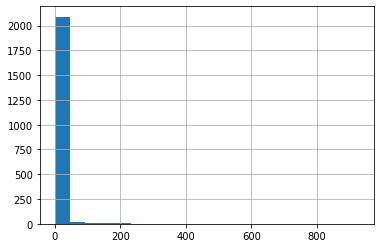

In [26]:
df_train['budget/revenue'].hist(bins=20)

this part of data takes up : 58.96666666666667  percent


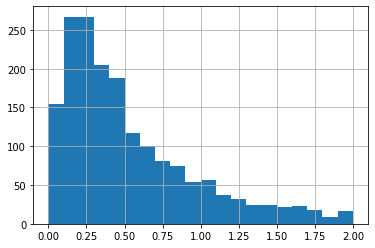

In [27]:
df_train[df_train['budget/revenue']<2.0]['budget/revenue'].hist(bins=20)
print('this part of data takes up :', df_train[df_train['budget/revenue']<2.0].shape[0]*100/df_train.shape[0],' percent')

#### "Paranormal Activity", a 2007 horror film makes incredible 193355800 dollars with only 15000 dollars budget, and it's true according to Wikipedia
#### it appears most movies in this dataset are unprofitable, only 21% has greater revenue than budget, this is miserable


# question2: 
    what is the relation between popularity and revenue?
#### plot 2d scatters with revenue as x and popularity as y

#### if we plot revenue and popylarity in full scale, we shall see that most of the data is crowded in a small area, where both popularity and revenue is low, because they are both long-tailed.
#### And we can see some outliers, whose popularity is high but revenue is just so so (for example "Baby Driver"), or whose poluparity is poor but revenue is amazing (for example "Furious 7" and "Avengers: Age of Ultron"), or whose poluparity and revenue are both incredible (for example "Beauty and the Beast")

<AxesSubplot:xlabel='revenue', ylabel='popularity'>

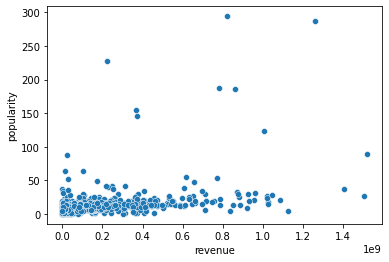

In [28]:
import seaborn as sns

sns.scatterplot(data=df_train, x="revenue", y="popularity")

#### if we only look at the majority of data (note that the 25%, 50%, 75% percentiles of "popularity" are 3.93, 7.43, 10.92; the 25%, 50%, 75% percentiles of "revenue" are 2.47million, 16.8million, 68.9million), it will be much clear

<AxesSubplot:xlabel='revenue', ylabel='popularity'>

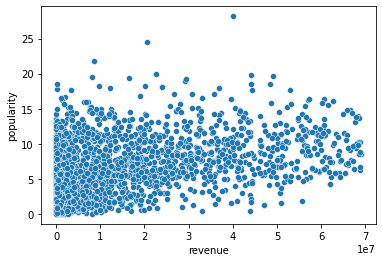

In [29]:
sns.scatterplot(data=df_train[(df_train['popularity']<=30)&(df_train['revenue']<=69000000)], x="revenue", y="popularity")

In [30]:
print(np.corrcoef(df_train['popularity'],df_train['revenue']))
print(np.corrcoef(df_train['popularity'],df_train['revenue_corrected']))

[[1.         0.46146029]
 [0.46146029 1.        ]]
[[1.         0.38530214]
 [0.38530214 1.        ]]


#### so the conclusion of question2 is: there is no obvious correlation between popularity anf revenue. High popularity may means the genres is fresh, and the movie is interesting, and it may leads to high revenues, but not always. Sometimes a movie makes a great fortune just because it meets the audiences' poor tastes, sometimes people just prefer popcorn films. That's just the market.

# question3: 
    which theme is most popular/ make most revenue?


#### scan each line, the count the number of each genres and accumulate the popularity/ revenue
#### note that a movie may has more than genres

In [31]:
dict_genres_pop = {}
dict_genres_rev = {}
dict_genres_count = {}
for index, row in df.iterrows():
    genres = row['genres']
    data_type = row['data']
    try:
        popularity = int(row['popularity'])
    except:
        popularity = 0
    try:
        revenue = int(row['revenue_corrected'])
    except:
        revenue = 0
    try:
        genres = eval(genres)
        for item in genres:
            name = item['name']
            # increment the genres count
            try:
                dict_genres_count[name] += 1
            except:
                dict_genres_count[name] = 1
            # add up popularity
            try:
                dict_genres_pop[name] += popularity
            except:
                dict_genres_pop[name] = popularity
            # only add up revenue for training set
            if data_type == 'train':
                try:
                    dict_genres_rev[name] += revenue
                except:
                    dict_genres_rev[name] = revenue
    # nan values for genres
    except: 
        continue

# in descend order
list_genres_count= sorted(dict_genres_count.items(), key=lambda x:x[1], reverse=True)
list_genres_pop= sorted(dict_genres_pop.items(), key=lambda x:x[1], reverse=True)
list_genres_rev= sorted(dict_genres_rev.items(), key=lambda x:x[1], reverse=True)

#### in this dataset, most of the movies are Drama/Comedy/Thriller/Action

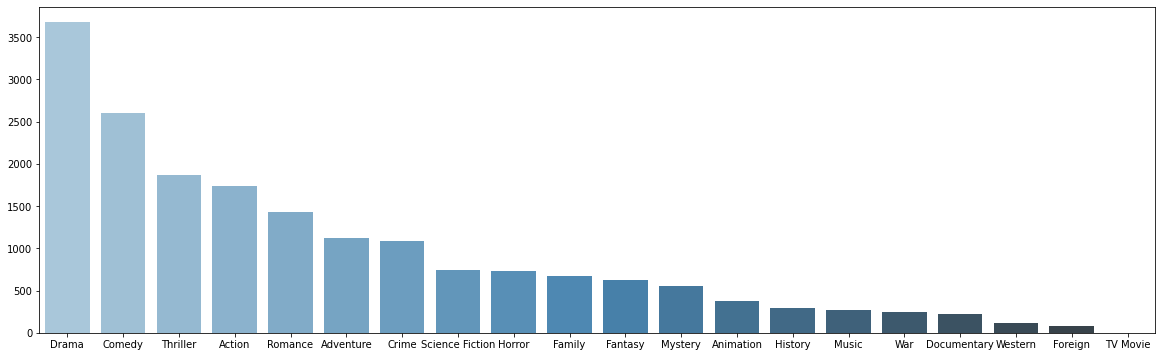

In [32]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=[item[0] for item in list_genres_count], y=[item[1] for item in list_genres_count],palette="Blues_d")

#### since the distribution of genres is unbalanced, we compare the average popularity/revenue of each genres

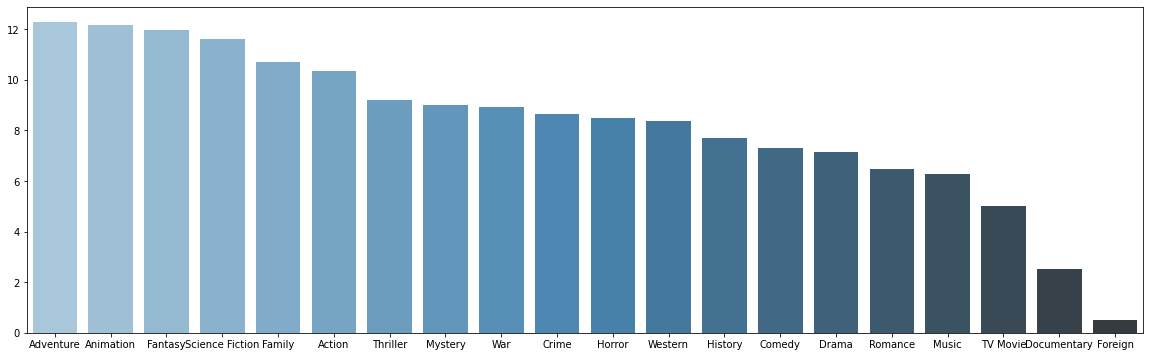

In [33]:
# caculate avarage
list_genres_pop = [(item[0], item[1]*1.0/dict_genres_count[item[0]]) for item in list_genres_pop]
# sort agai
list_genres_pop= sorted(list_genres_pop, key=lambda x:x[1], reverse=True)
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=[item[0] for item in list_genres_pop], y=[item[1] for item in list_genres_pop],palette="Blues_d")

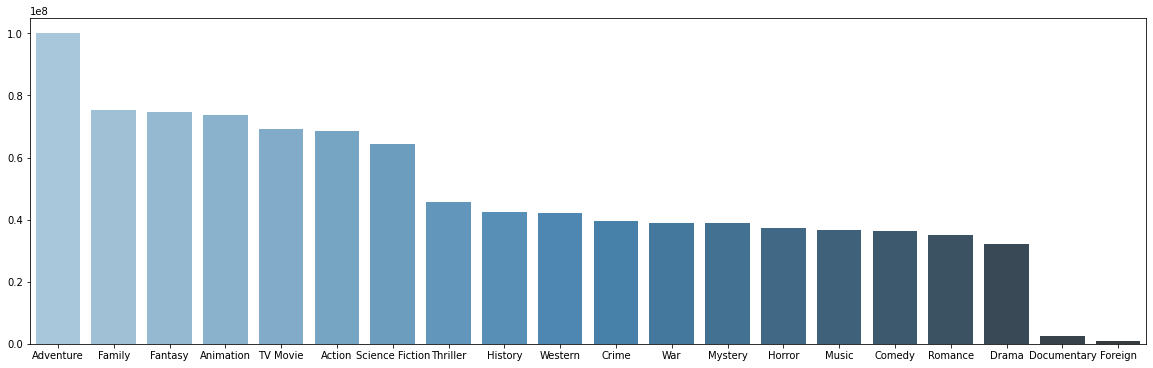

In [34]:
# caculate avarage
list_genres_rev = [(item[0], item[1]*1.0/dict_genres_count[item[0]]) for item in list_genres_rev]
# sort again
list_genres_rev= sorted(list_genres_rev, key=lambda x:x[1], reverse=True)
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=[item[0] for item in list_genres_rev], y=[item[1] for item in list_genres_rev],palette="Blues_d")

#### so the conclusion is question3 is: Adventure, Animation, Fantasy, Family, Action movies tend to be more popular and profitable. Note that TV movie, Foreign and Western not being considered since they are so few

# question4: 
    which company is best at making popular/ profitable movies
#### note that one movie may have multiple companies involved, this analysis with share similar method with question3

In [35]:
dict_comp_pop = {}
dict_comp_rev = {}
dict_comp_count = {}
for index, row in df.iterrows():
    value = row['production_companies']
    data_type = row['data']
    try:
        popularity = int(row['popularity'])
    except:
        popularity = 0
    try:
        revenue = int(row['revenue_corrected'])
    except:
        revenue = 0
    try:
        value = eval(value)
        for item in value:
            name = item['name']
            # increment the company count
            try:
                dict_comp_count[name] += 1
            except:
                dict_comp_count[name] = 1
            # add up popularity
            try:
                dict_comp_pop[name] += popularity
            except:
                dict_comp_pop[name] = popularity
            # only add up revenue for training set
            if data_type == 'train':
                try:
                    dict_comp_rev[name] += revenue
                except:
                    dict_comp_rev[name] = revenue
    # nan values for company
    except: 
        continue

# in descend order
list_comp_count= sorted(dict_comp_count.items(), key=lambda x:x[1], reverse=True)
list_comp_pop= sorted(dict_comp_pop.items(), key=lambda x:x[1], reverse=True)
list_comp_rev= sorted(dict_comp_rev.items(), key=lambda x:x[1], reverse=True)

#### there are 7087 companies in this dataset, which is way too many to plot together. So we will filter the first 20 companies with most frequences

In [36]:
list_comp_count = list_comp_count[:20]
list_comp_pop = [item for item in list_comp_pop if item[0] in [ele[0] for ele in list_comp_count]]
list_comp_rev = [item for item in list_comp_rev if item[0] in [ele[0] for ele in list_comp_count]]

#### in this dataset, the most frequent production companies are: Warner Brothers, Universal, Paramount, 20th Century Fox... you have it

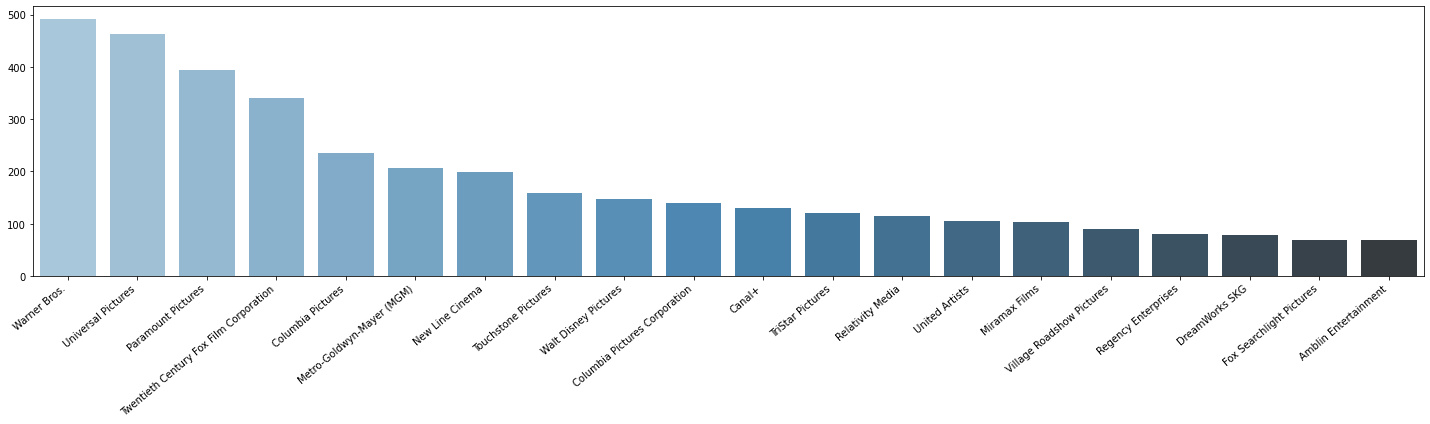

In [37]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=[item[0] for item in list_comp_count], y=[item[1] for item in list_comp_count],palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

#### calculate and plot the average popularity and revenue from these companies

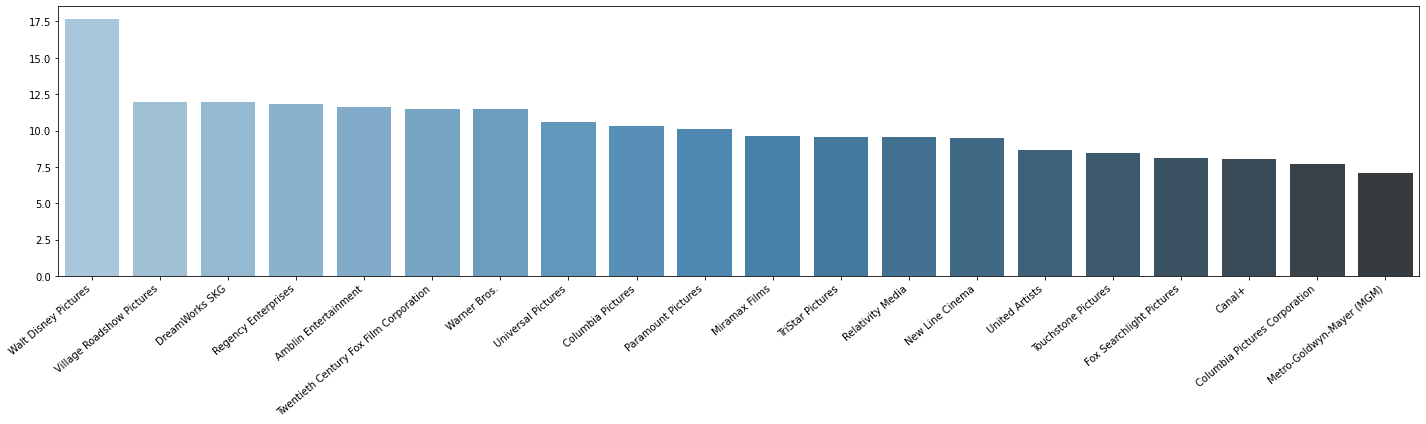

In [38]:
# caculate avarage
list_comp_pop = [(item[0], item[1]*1.0/dict_comp_count[item[0]]) for item in list_comp_pop]
# sort again
list_comp_pop= sorted(list_comp_pop, key=lambda x:x[1], reverse=True)
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=[item[0] for item in list_comp_pop], y=[item[1] for item in list_comp_pop],palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

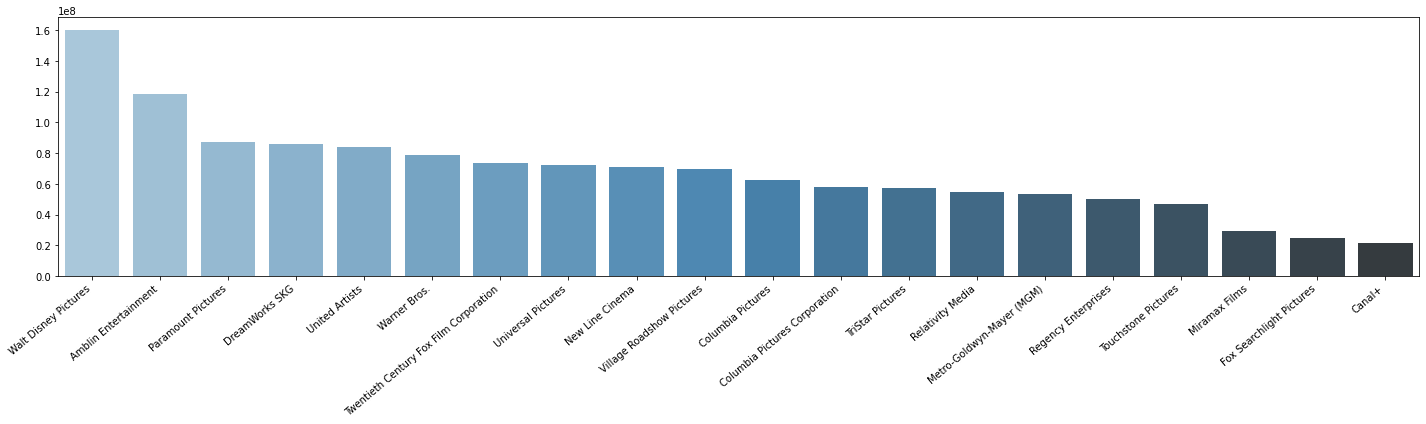

In [39]:
# caculate avarage
list_comp_rev = [(item[0], item[1]*1.0/dict_comp_count[item[0]]) for item in list_comp_rev]
# sort again
list_comp_rev= sorted(list_comp_rev, key=lambda x:x[1], reverse=True)
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=[item[0] for item in list_comp_rev], y=[item[1] for item in list_comp_rev],palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

#### the conclusion of this part is interesting. Now we can see who is good at making commercial movies, and who is good at making extraodinary movies. 
#### Paramount Pictures for example, makes a lot of money from its movies, but their popularity only ranks at 17th
#### Amblin Entertainment on the other hand, makes movies with profits and great popularity at the same time! Let's take a look at it's products

In [40]:
def company_filter(value, company_name):
    try:
        if company_name in value:
            return 1
        else:
            return 0
    except:
        return 0

# create a column of whether Amblin Entertainment is involved
df['is_Amblin_Entertainment'] = df.apply(lambda line:company_filter(line['production_companies'], 'Amblin Entertainment'),axis=1)
display(df[df['is_Amblin_Entertainment']==1][['original_title','release_date', 'budget', 'popularity', 'revenue_corrected','data']].sort_values(by='popularity',ascending=False))

,original_title,release_date,budget,popularity,revenue_corrected,data
2291,Schindler's List,11/29/93,22000000,41.725123,NaN,test
1934,Jurassic World,6/9/15,150000000,32.790475,NaN,test
4285,Back to the Future,7/3/85,19000000,25.778509,NaN,test
2116,Saving Private Ryan,7/24/98,70000000,21.758054,NaN,test
14,Minority Report,6/20/02,102000000,20.666063,5.119095e+08,train
...,...,...,...,...,...,...
199,Noises Off...,3/20/92,12000000,4.179487,NaN,test
4352,Continental Divide,9/18/81,0,2.931013,NaN,test
986,Dad,10/27/89,19000000,2.727017,4.038341e+07,train
883,The Lost World: Jurassic Park,5/23/97,73000000,0.788123,NaN,test


# question5: 
    Does an actors/actresses have preference upon genres to choose and order of roles to play?

In [41]:
dict_cast_count = {}
for index, row in df.iterrows():
    value = row['cast']
#     print(value)
#     print(type(value))
    data_type = row['data']
    try:
        value = eval(value)
        for item in value:
#             print(item)
#             print(type(item))
            name = item['name']
            # increment the count
            try:
                dict_cast_count[name] += 1
            except:
                dict_cast_count[name] = 1
    # nan values for company
    except: 
        continue
#     break

# in descend order
list_cast_count= sorted(dict_cast_count.items(), key=lambda x:x[1], reverse=True)
print('the total number of actors/actress: ',len(list_cast_count))

the total number of actors/actress:  75944


#### Since there are too many cast, we only focus on the most frequent 20 actors/actresses

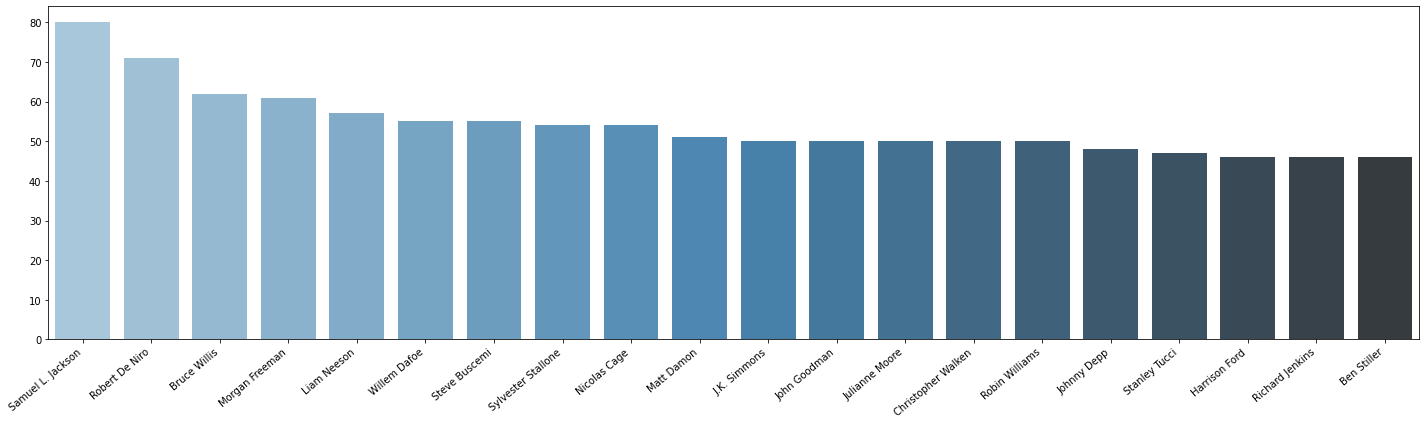

In [42]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=[item[0] for item in list_cast_count[:20]], y=[item[1] for item in list_cast_count[:20]],palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

#### scan each line of data, record the information of these 20 actors/actresses

In [62]:
list_cast_20 = [item[0] for item in list_cast_count[:20]]
print('the most frequent 20 actors/actresses: ',list_cast_20)
list_genres = [item[0] for item in list_genres_count]
# print(list_genres)
dict_genres = {}
for item in list_genres:
    dict_genres[item] = 0
dict_cast_genres = {}
for person in list_cast_20:
#     dict_cast_genres[person] = {'genres': dict_genres, 'order': {}, 'avg_revenue': 0, 'avg_pop': 0, 'movie_count': 0}
    dict_cast_genres[person] = {'genres': dict_genres, 'order': {}, 'avg_pop': 0, 'movie_count': 0}

    
# print(dict_cast_genres)
for index, row in df.iterrows():
    genres = row['genres']
    cast = row['cast']
    popularity = row['popularity']
    for target in list_cast_20:
        try:
            if target in cast:
                # movie count
                dict_cast_genres[target]['movie_count'] += 1
                
                # genres
                for g in list_genres:
                    if g in genres:
                        dict_cast_genres[target]['genres'][g] += 1
                        
                # cast
                cast = eval(cast)
                for dict_item in cast:
                    if dict_item['name'] == target:
                        order = dict_item['order']
                try:
                    dict_cast_genres[target]['order'][order] += 1
                except:
                    dict_cast_genres[target]['order'][order] = 1
                    
                # popularity
                try:
                    dict_cast_genres[target]['avg_pop'] += popularity
                except:
                    continue
                    
        except:
            continue

the most frequent 20 actors/actresses:  ['Samuel L. Jackson', 'Robert De Niro', 'Bruce Willis', 'Morgan Freeman', 'Liam Neeson', 'Willem Dafoe', 'Steve Buscemi', 'Sylvester Stallone', 'Nicolas Cage', 'Matt Damon', 'J.K. Simmons', 'John Goodman', 'Julianne Moore', 'Christopher Walken', 'Robin Williams', 'Johnny Depp', 'Stanley Tucci', 'Harrison Ford', 'Richard Jenkins', 'Ben Stiller']
the json structure:  
 {'genres': {'Drama': 458, 'Comedy': 344, 'Thriller': 318, 'Action': 284, 'Romance': 138, 'Adventure': 185, 'Crime': 206, 'Science Fiction': 107, 'Horror': 51, 'Family': 97, 'Fantasy': 101, 'Mystery': 84, 'Animation': 56, 'History': 30, 'Music': 27, 'War': 26, 'Documentary': 13, 'Western': 13, 'Foreign': 1, 'TV Movie': 0}, 'order': {1: 14, 0: 17, 8: 3, 4: 7, 10: 1, 2: 11, 9: 4, 7: 2, 14: 1, 5: 2, 6: 3, 11: 1, 3: 6, 56: 1, 50: 1, 15: 1, 13: 2, 37: 1, 21: 1, 44: 1}, 'avg_pop': 1226.0028379999999, 'movie_count': 80}


#### By entering the name of actor/actress, we can come up with a brief report about him/her, like: how many movies he has played, the average popularity of the movies he/she has played, his/her most frequent choice of genres and orders

Johnny Depp
has played in  41  movies in this dataset
his/her average popularity is: 16.08179073170731


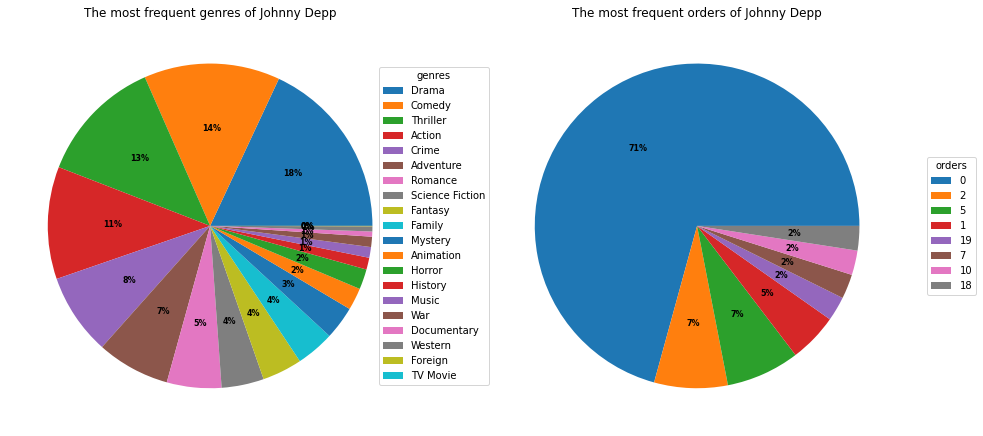

In [117]:
target = 'Johnny Depp'
json = dict_cast_genres[target]

print(target)
print('has played in ',json['movie_count'],' movies in this dataset')
print('his/her average popularity is:', json['avg_pop']/json['movie_count'])

dict_genres = json['genres']
dict_genres= sorted(dict_genres.items(), key=lambda x:x[1], reverse=True)
genres_count = [item[1] for item in dict_genres]
genres = [item[0] for item in dict_genres]
dict_order = json['order']
dict_order= sorted(dict_order.items(), key=lambda x:x[1], reverse=True)
order_count = [item[1] for item in dict_order]
order = [item[0] for item in dict_order]

# Make figure and axes
fig, ax = plt.subplots(1, 2, figsize=(16, 10), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax[0].pie(genres_count, autopct='%.0f%%', radius=1)
ax[0].legend(wedges, genres,
          title="genres",
          loc="center right",
          bbox_to_anchor=(1, 0, 0.2, 1))
plt.setp(autotexts, size=8, weight="bold")
ax[0].set_title("The most frequent genres of "+target, loc='center')

wedges, texts, autotexts = ax[1].pie(order_count, autopct='%.0f%%', radius=1)
ax[1].legend(wedges, order,
          title="orders",
          loc="center right",
          bbox_to_anchor=(1, 0, 0.2, 1))
plt.setp(autotexts, size=8, weight="bold")
ax[1].set_title("The most frequent orders of "+target, loc='center')


plt.show()

## Conclusion

#### So we have explored the answers to the 5 questions, I think one of the possible usage is that it provides insights for directors to know how to make a movie they want. For example, if you wish to make a very profitable movie, it's better to make a popcorn movie that catches the audiences' eyes, and choose a theme of Adventure/Action/Science Fiction. You will probably wish to work with Walt Disney or Paramount, if better, Amblin Entertainment. And once you have decided your theme, you can choose the ideal actors/actresses that meet your taste by making a report in question 5.
